In [ ]:
#|default_exp data.transforms

# Data Transforms

> Data transformation, all transforms are done with numpy

In [ ]:
#|export
from fastcore.all import *
from PIL import Image
import numpy as np
import polvo as pv

/home/michael/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
def np2pil(image): return Image.fromarray(image)

In [ ]:
#|export
def pil2np(image): return np.array(image)

In [ ]:
#|export
class AlignOrientation():
    def __init__(self, orientation='vertical', **kwargs):
        "Keep all images in same orientation"
        self.orientation = orientation
        
    def transform(self, x:np.ndarray):
        h, w = x.shape[:2]
        if (w>h and self.orientation=='vertical') or (h>w and self.orientation=='horizontal'):
            self._rotated = True
            return np.rot90(x)
        self._rotated = False
        return x
    
    def reverse(self, x:np.array):
        if self._rotated: return np.rot90(x)
        return x

<AxesSubplot:>

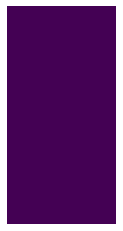

In [ ]:
image = np.zeros((100, 200), dtype=np.uint8)
orient = AlignOrientation('vertical')
image = orient.transform(image)
pv.show_image(image)

<AxesSubplot:>

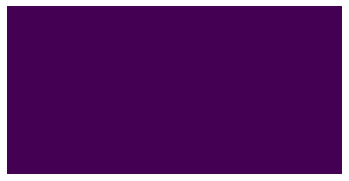

In [ ]:
pv.show_image(orient.reverse(image))

<AxesSubplot:>

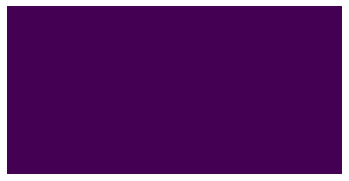

In [ ]:
image = np.zeros((100, 200), dtype=np.uint8)
orient = AlignOrientation('horizontal')
image = orient.transform(image)
pv.show_image(image)

<AxesSubplot:>

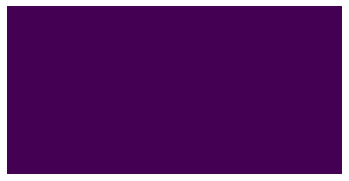

In [ ]:
pv.show_image(orient.reverse(image))

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()